## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [1]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df = df[(df['WaveNumber'] >= 400) & (df['WaveNumber'] <= 1800)].reset_index()

In [4]:
def normalise(absorbances):
    max_value = np.max(absorbances)
    normalized_absorbances = absorbances / max_value
    return normalized_absorbances

df['Absorbance'] = df.groupby('SpecID')['Absorbance'].transform(lambda x: normalise(x))

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

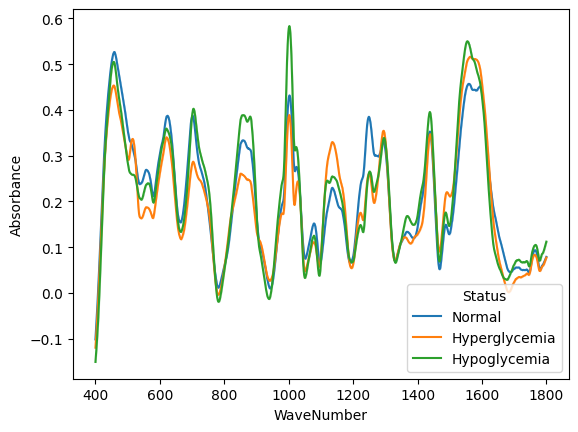

In [5]:
sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [6]:
peaks = []
widths = []
prom = []

for _, group in df.groupby('SpecID'):
    peak_index, weights = find_peaks(x=group['Absorbance'], distance=10, width=1)
    peaks += list(group.iloc[peak_index].index.values)
    widths += list(weights['widths'])
    prom += list(weights['prominences'])

In [7]:
weights['widths']

array([  2.70949605,   1.83573774, 134.11888914,   1.38199318,
         2.51390722,  24.20060399,   2.04350691,   1.55712552,
         1.78676651,  17.54200636,   1.76611917,   2.09939179,
        23.10380665,   2.53173841,   1.73808072,  33.98318381,
         1.55293148,   1.6213663 ,   1.08655903,  83.73538968,
         1.13757461,   1.37333975,   1.52725144,   1.53832901,
         1.9429546 ,   1.79801383, 104.04847287,   1.96291512,
        18.92683095,   2.67129489,   3.92651496,   1.65484231,
        15.01710207,   1.58037629,  49.21993166,  13.60184931,
         1.51107214,   8.5912398 ,   3.81630684,   1.74242619,
         9.53477332,   1.43396383,   1.18903099,  62.7423805 ,
         2.18625052,   1.18904422,   1.7486989 ,   7.09570733,
        21.85112743, 152.45588517,  17.02055569,   2.70326555,
         3.66573406,   3.1968601 ,   5.66501356,  30.42055589,
         2.54761575,   2.34458723,   5.18395955, 133.14114612,
         3.30491973,  23.89262959,   3.34611922,   6.01

In [8]:
print(len(peaks))

158412


Below shows a scatterplot of the coordinates of all the peaks we have found

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

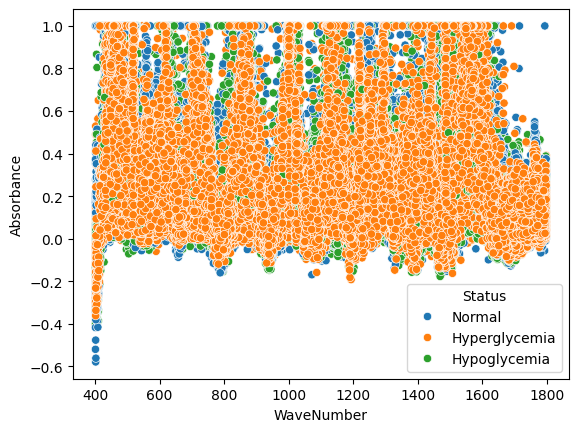

In [9]:
sns.scatterplot(data=df.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", hue="Status")

We then add the peak information to our main dataframe

In [10]:
peak_df = df.iloc[peaks]
peak_df['Widths'] = widths
peak_df['Prominences'] = prom

C:\Users\stang\AppData\Local\Temp\ipykernel_11420\2901317241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Widths'] = widths
C:\Users\stang\AppData\Local\Temp\ipykernel_11420\2901317241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Prominences'] = prom


In [11]:
peak_df

,index,SpecID,Seq,WaveNumber,SurID,Status,Absorbance,Widths,Prominences
7,300,201210-1-00,300,405.01138,201210-1,Normal,0.020906,1.541996,0.003468
35,328,201210-1-00,328,424.14578,201210-1,Normal,0.149045,1.379120,0.002748
48,341,201210-1-00,341,433.02960,201210-1,Normal,0.187460,2.338415,0.007454
60,353,201210-1-00,353,441.23007,201210-1,Normal,0.236667,2.321832,0.008457
82,375,201210-1-00,375,456.26425,201210-1,Normal,0.333985,3.443829,0.013201
...,...,...,...,...,...,...,...,...,...
6228874,8010021,210526-3-49,2256,1741.68570,210526-3,Hyperglycemia,0.162470,2.925968,0.012342
6228890,8010037,210526-3-49,2272,1752.61960,210526-3,Hyperglycemia,0.171978,3.046829,0.023089
6228912,8010059,210526-3-49,2294,1767.65380,210526-3,Hyperglycemia,0.194877,34.063979,0.082713
6228926,8010073,210526-3-49,2308,1777.22090,210526-3,Hyperglycemia,0.190464,6.135135,0.028817


In [12]:
peaks = [[407, 495], [453,454], [516,537], 519, [603,738], [620, 624], [821, 839], [866, 887], 972, [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], 1170, [1188, 1196], [1212-1294], [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], 1668]

In [13]:
# Peaks list, corrected format
peaks_corrected = [[407, 495], [453, 454], [516, 537], [519, 519], [603, 738], [620, 624], [821, 839], [866, 887], [972, 972], 
         [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], [1170, 1170], [1188, 1196], [1212, 1294], 
         [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], [1668, 1668]]

# Convert peaks to a more efficient structure for processing
peak_ranges = [(peak[0], peak[1]) for peak in peaks_corrected]

# Create a function to determine the peak range for each WaveNumber
def find_peak_range(wavenumber):
    for start, end in peak_ranges:
        if start <= wavenumber <= end:
            return f"{start}-{end}"
    return None

# Apply the function to create a new column for peak range
peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)

# Now, group by both SpecID and the new PeakRange column, and compute max Absorbance for each group
grouped = peak_df.groupby(['SpecID', 'PeakRange'])['Absorbance'].max().reset_index()

# Pivot the table to have SpecID as rows and PeakRange as columns, filled with max Absorbance values
efficient_pivot_df = grouped.pivot(index='SpecID', columns='PeakRange', values='Absorbance').reset_index()

# Fill NaN values with an appropriate placeholder if needed (e.g., 0 or empty string), here we keep NaNs
efficient_pivot_df


C:\Users\stang\AppData\Local\Temp\ipykernel_11420\3083927011.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)


PeakRange,SpecID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,1611-1653,407-495,516-537,603-738,821-839,866-887
0,201210-1-00,NaN,0.271586,NaN,0.174375,NaN,0.261553,0.365487,NaN,0.151334,0.368272,0.458009,0.353587,0.175610,1.000000,NaN,0.520857
1,201210-1-01,0.366387,NaN,0.263845,0.191988,0.127557,0.247582,0.540812,NaN,NaN,0.755355,0.881073,0.614768,0.219905,1.000000,NaN,0.378138
2,201210-1-02,0.037219,NaN,0.006469,0.050976,0.003977,0.045430,0.073097,NaN,NaN,0.082147,0.181346,0.113984,NaN,0.474979,NaN,NaN
3,201210-1-03,NaN,NaN,0.018511,NaN,NaN,0.284837,NaN,NaN,0.004842,0.071112,0.103700,0.491561,NaN,0.172439,-0.026729,NaN
4,201210-1-04,0.351088,0.143166,0.140120,0.143514,NaN,0.180887,0.431154,NaN,NaN,0.549903,1.000000,0.508560,0.057889,0.694454,NaN,0.274786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,210526-3-45,1.000000,NaN,0.182299,0.540647,0.014378,0.615247,0.539018,NaN,NaN,0.701767,0.138936,0.916585,0.862056,0.722146,NaN,NaN
3041,210526-3-46,NaN,NaN,0.159203,NaN,0.004371,0.568745,0.503660,NaN,NaN,0.734068,0.194549,0.960089,0.982561,0.862756,0.519325,0.544076
3042,210526-3-47,0.980144,NaN,0.043817,NaN,0.061740,0.693494,0.401558,NaN,NaN,0.752993,0.218108,0.904960,1.000000,0.922964,NaN,0.644791
3043,210526-3-48,NaN,NaN,0.168774,0.405610,0.096855,0.538828,0.609803,NaN,NaN,0.680308,0.136935,1.000000,0.889763,0.872886,NaN,0.602072


In [14]:
# Melt the DataFrame to transform it into a long format
long_format_df = efficient_pivot_df.melt(id_vars='SpecID', var_name='PeakRange', value_name='Weight')

# Drop NaN values
long_format_df.dropna(inplace=True)

long_format_df.reset_index(drop=True, inplace=True)
long_format_df

,SpecID,PeakRange,Weight
0,201210-1-01,1000-1003,0.366387
1,201210-1-02,1000-1003,0.037219
2,201210-1-04,1000-1003,0.351088
3,201210-1-09,1000-1003,0.406225
4,201210-1-12,1000-1003,0.347356
...,...,...,...
31008,210526-3-44,866-887,0.785754
31009,210526-3-46,866-887,0.544076
31010,210526-3-47,866-887,0.644791
31011,210526-3-48,866-887,0.602072


In [31]:
long_format_df.rename(columns={'SpecID':'SpecID:START_ID', 'PeakRange':'PeakRange:END_ID', 'Weight':'Weight:float'}, inplace=True)
long_format_df[':TYPE'] = 'Has_Peak'

In [32]:
long_format_df.to_csv('../../data/graph_2_4/relationships.csv')

In [33]:
spectra_df = long_format_df.groupby(['SpecID:START_ID']).first().reset_index()
spectra_df.drop(columns=['PeakRange:END_ID', 'Weight:float', ':TYPE'], inplace=True)

In [34]:
spectra_df.rename(columns={'SpecID:START_ID': 'SpecID:ID'}, inplace=True)
spectra_df[':LABEL'] = 'Spectra'

In [35]:
spectra_df.to_csv('../../data/graph_2_4/spectra.csv')

In [36]:
peak_range_df = long_format_df.groupby(['PeakRange:END_ID']).first().reset_index()
peak_range_df.drop(columns=['SpecID:START_ID', 'Weight:float', ':TYPE'], inplace=True)

In [37]:
peak_range_df.rename(columns={'PeakRange:END_ID':'PeakRange:ID'}, inplace=True)
peak_range_df[':LABEL'] = 'PeakRange'

In [38]:
peak_range_df.to_csv('../../data/graph_2_4/peakrange.csv')